# Saving and Loading models using .syspy extension

Example created by Samir Angelo Milani Martins

---
### Obtaining the model using FROLS.

In [ ]:
import pandas as pd
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_results
from sysidentpy.utils.save_load import save_model, load_model


# Generating 1 input 1 output sample data from a benchmark system
x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.0001,
                                                   train_percentage=90)

basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=3,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='aic',
    estimator='least_squares',
    basis_function=basis_function
)

model.fit(X=x_train, y=y_train)

yhat = model.predict(X=x_valid, y=y_valid)

# Gathering results
r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])

---
### Saving obtained model in file "model_name.syspy"

In [4]:
# save_model(model_variable, file_name.syspy, path (optional))
save_model(model, 'model_name.syspy', 'C:/Users/Samir/Desktop/')

---
### Loading model and checking if everything went smoothly

In [3]:
xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

NameError: name 'np' is not defined

```{note}
 Here we are creating random samples with white noise and letting the algorithm choose
 the number of terms based on the minimum value of information criteria. 
 This is not the best approach in System Identification, but serves as a simple example. 
 The information criteria must be used as an __auxiliary tool__ to select *n_terms*. 
 Plot the information values to help you on that!

 If you run the example above several times you might find some cases where the
 algorithm choose only the first two regressors, or four (depending on the information
 criteria method selected). This is because the minimum value of information criteria
 depends on residual variance (affected by noise) and have some limitations in nonlinear
 scenarios. However, if you check the ERR values (robust to noise) you will see that the
 ERR is ordering the regressors in the correct way!

 We have some examples on *information_criteria* notebook!
```

```{note}
This documentation and the examples below are written with MyST Markdown, a form
of markdown that works with Sphinx. For more information about MyST markdown, and
to use MyST markdown with your Sphinx website,
see [the MyST-parser documentation](https://myst-parser.readthedocs.io/)
```

The *n_info_values* limits the number of regressors to apply the information criteria. We choose $n_y = n_x = \ell = 2$, so the candidate regressor is a list of 15 regressors. We can set *n_info_values = 15* and see the information values for all regressors. This option can save some amount of computational resources when dealing with multiples inputs and large datasets.

In [ ]:
basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=15,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='aic',
    estimator='least_squares',
    basis_function=basis_function
)

model.fit(X=x_train, y=y_train)

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

Now running without executing information criteria methods (setting the *n_terms*) because we already know the optimal number of regressors

In [ ]:
basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=False,
    n_info_values=15,
    n_terms=3,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='aic',
    estimator='least_squares',
    basis_function=basis_function
)
model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)


 Original model 
       Regressors  Parameters             ERR
0        x1(k-2)  9.0001E-01  9.58191145E-01
1         y(k-1)  2.0000E-01  3.82763130E-02
2  x1(k-1)y(k-1)  9.9996E-02  3.53250960E-03

 Model Loaded from file 
       Regressors  Parameters             ERR
0        x1(k-2)  9.0001E-01  9.58191145E-01
1         y(k-1)  2.0000E-01  3.82763130E-02
2  x1(k-1)y(k-1)  9.9996E-02  3.53250960E-03

 Predictions are the same!


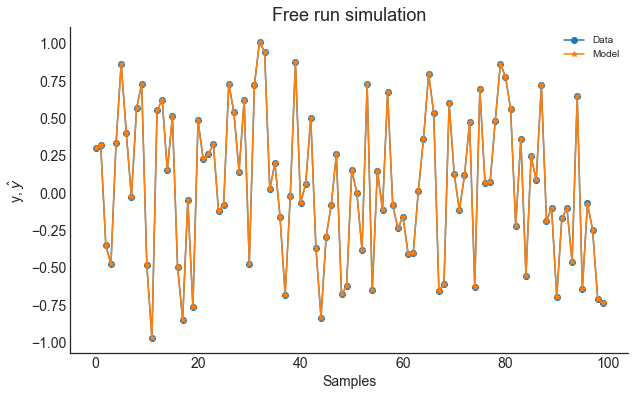

In [5]:
# load_model(file_name.syspy, path (optional))
loaded_model = load_model('model_name.syspy', 'C:/Users/Samir/Desktop/')

# Predicting output with loaded_model
yhat_loaded = loaded_model.predict(X=x_valid, y=y_valid)

r_loaded = pd.DataFrame(
    results(
        loaded_model.final_model, loaded_model.theta, loaded_model.err,
        loaded_model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])

# Printing both: original model and model loaded from file
print('\n Original model \n', r)
print('\n Model Loaded from file \n',r_loaded)

# Checking predictions from both: original model and model loaded from file
if (yhat==yhat_loaded).all():
    print('\n Predictions are the same!')
    
# Ploting results
plot_results(y=y_valid, yhat=yhat_loaded, n=1000)